### Analyze surface heat flow

The script is designed to analyze and visualize heat flow and depth data for a specified geological location (e.g., Cascadia). It begins by setting file paths for CSV data containing heat flow and depth measurements, then verifies the existence of these files.

The first block of code reads the CSV files into Pandas DataFrames and extracts the relevant columns for distances, heat flows, and depths. It uses interpolation techniques to derive the relationship between heat flows and distances, as well as to estimate the corresponding heat flow at a specific depth.

In the second block, the script creates a higher-resolution dataset for distances and calculates the derivatives of heat flows with respect to these distances. It then visualizes the results in a figure with two subplots: one displaying heat flows and their derivatives, and the other illustrating the relationship between distances and depths. The plots include interpolated points for specific values, enhancing the analysis's clarity. Finally, the figure is saved to a specified directory.

Specially, through the interpolation, I show the decoupling depth correspond to a maximum in the derivative.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import numpy as np
from scipy.interpolate import interp1d

# directory to the aspect Lab
ASPECT_LAB_DIR = os.environ['ASPECT_LAB_DIR']
RESULT_DIR = os.path.join(ASPECT_LAB_DIR, 'results')

### Load in the heat flow file

The block below reads heat flow and depth data from CSV files, and a point for a specified location.
Then I select from the profiles of Tohoku and Cascadia, both from the Figure 3, Morishige_Kuwatani_2020

In [3]:
# This script reads heat flow and depth data from CSV files for a specified location.
# It verifies the existence of the input files and extracts relevant columns for analysis.

# from figure 3a, for Tohuku Morishige_Kuwatani_2020
file_path = "heat_flow_fit_tohoku.csv"; depth_file_path = "depth_tohoku.csv"; location="Tohoku"; depth_value = 80.76 
# from figure 3b, for Cascadia Morishige_Kuwatani_2020
# file_path = "heat_flow_fit_cascadia.csv"; depth_file_path = "depth_cascadia.csv"; location="Cascadia"; depth_value = 83.85 

assert(os.path.isfile(file_path))           # Assert that the heat flow data file exists
assert(os.path.isfile(depth_file_path))     # Assert that the depth data file exists

# Read the CSV file into DataFrames
df = pd.read_csv(file_path)                  # DataFrame for heat flow data
df1 = pd.read_csv(depth_file_path)           # DataFrame for depth data

distances = df['distance']                    # Extract distances from heat flow DataFrame
heat_flows = df['heat flow']                  # Extract heat flows from heat flow DataFrame
distances1 = df1['distance']                  # Extract distances from depth DataFrame
depths = df1['depth']                         # Extract depths from depth DataFrame

### Analyze the heat flow data

This block performs interpolation of heat flows and distances, calculates derivatives,
and visualizes the results using subplots for heat flow and depth analysis.
The point with a decoupling depth is pinned on the plot, showing the decoupling depth corresponds to a maximum in the derivative.

Saved figure:  /home/lochy/ASPECT_PROJECT/aspectLib/results/heat_flow_analyze_Morishige_Kuwatani_2020_Tohoku.png


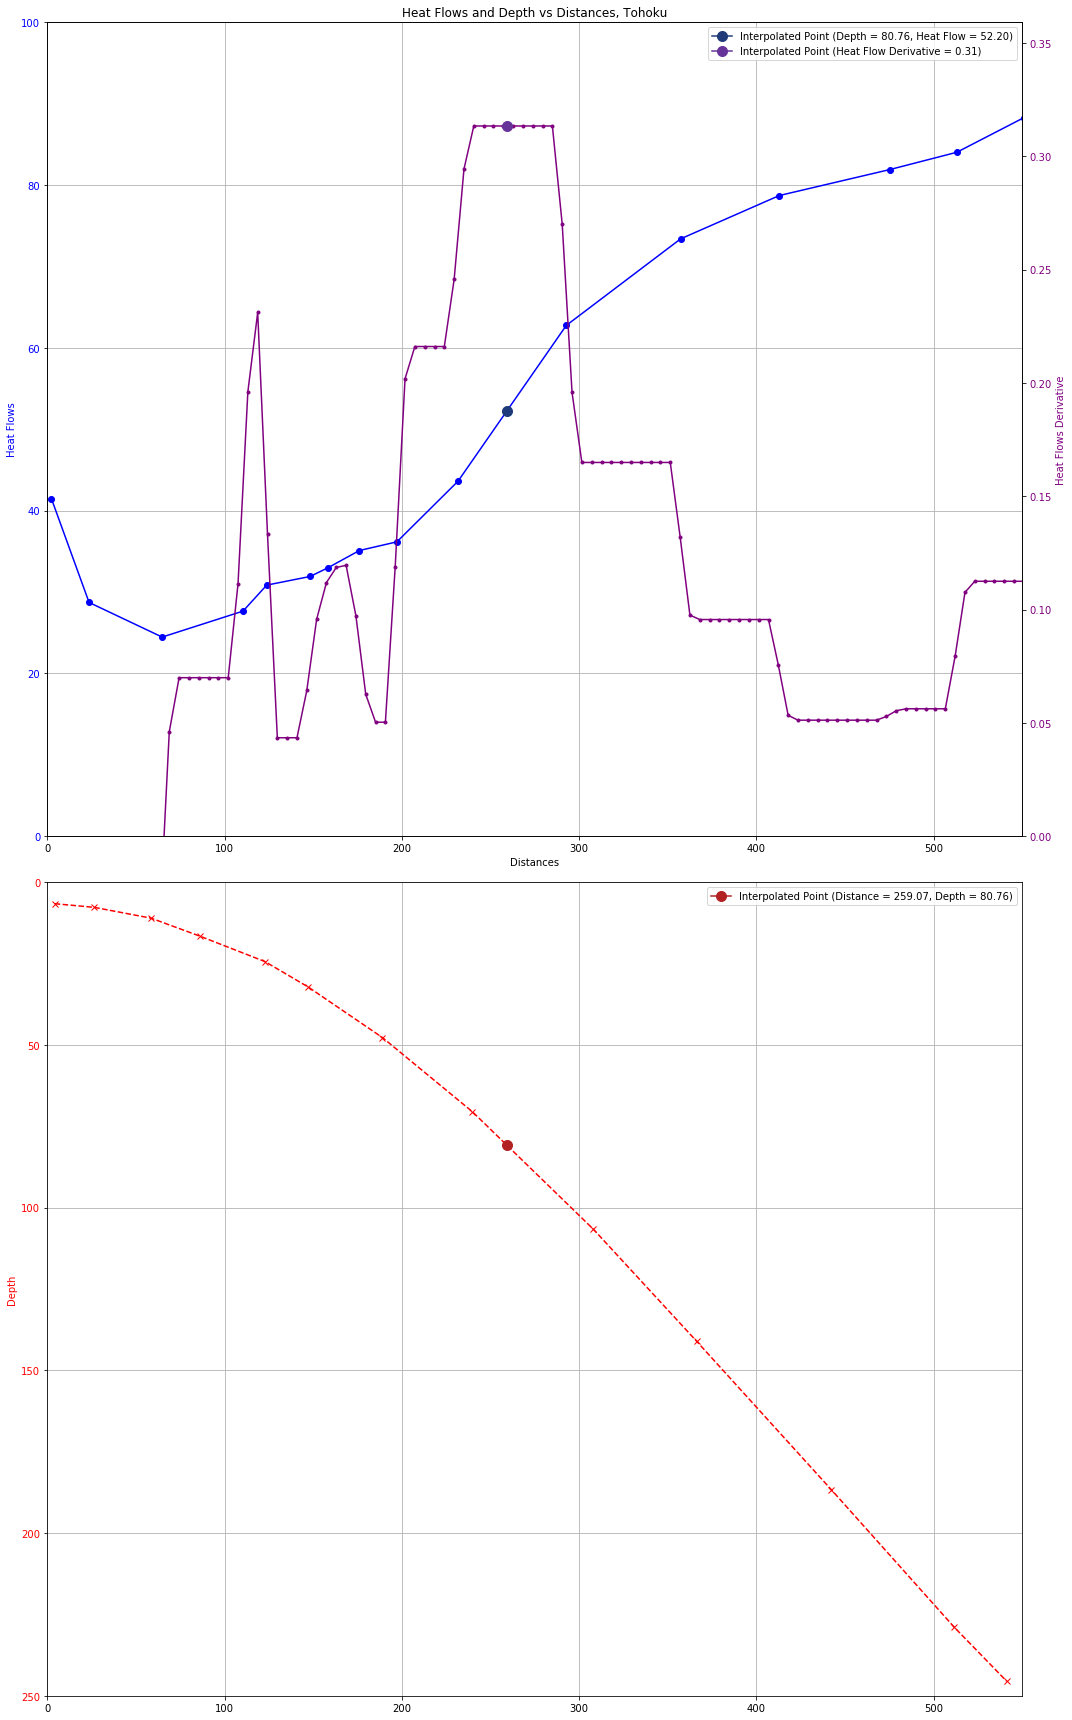

In [4]:
# This section performs interpolation of heat flows and distances, calculates derivatives,
# and visualizes the results using subplots for heat flow and depth analysis.

# Create interpolators for heat flows and distances based on input data
interpolator = interp1d(distances, heat_flows, bounds_error=False, fill_value="extrapolate")  # Interpolator for heat flows
interpolator1 = interp1d(-depths, distances1, bounds_error=False, fill_value="extrapolate")   # Interpolator for distances based on depth

# Interpolate the value of distance where depth is a given value
distance_at_given_depth = interpolator1(depth_value)  # Distance corresponding to the specified depth
heat_flow_at_given_depth = interpolator(distance_at_given_depth)  # Heat flow at the interpolated distance

# Create a higher-resolution set of distances and interpolate the heat flow values
high_res_distances = np.linspace(distances.min(), distances.max(), 100)  # High-resolution distances
high_res_heat_flows = interpolator(high_res_distances)  # Interpolated heat flows at high resolution

# Calculate the derivative of heat_flows with respect to the high-resolution distances
heat_flows_derivative_high_res = np.gradient(high_res_heat_flows, high_res_distances)  # Derivative calculation
interpolator2 = interp1d(high_res_distances, heat_flows_derivative_high_res, bounds_error=False, fill_value="extrapolate")  # Interpolator for derivatives
heat_flows_derivative_at_given_depth = interpolator2(distance_at_given_depth)  # Derivative at the given distance

# Create a figure with subplots
fig = plt.figure(figsize=(15, 24), tight_layout=True)  # Initialize figure with specified size
gs = gridspec.GridSpec(2, 1)  # Create a grid for subplots

# Plot Heat Flows
# #1E3A78 - darker blue
ax1 = fig.add_subplot(gs[0, 0])  # First subplot for heat flows
ax1.plot(distances, heat_flows, marker='o', linestyle='-', color='b')  # Plot heat flows
point1, = ax1.plot(distance_at_given_depth, heat_flow_at_given_depth, marker='o', color="#1E3A78", markersize=10, label='Interpolated Point (Depth = %.2f, Heat Flow = %.2f)' % (depth_value, heat_flow_at_given_depth))  # Mark interpolated point
ax1.set_title('Heat Flows and Depth vs Distances, %s' % location)  # Set title
ax1.set_xlabel('Distances')  # Set x-axis label
ax1.set_ylabel('Heat Flows', color='b')  # Set y-axis label
ax1.set_xlim(0, 550)  # Set x-axis limits
ax1.set_ylim(0, 100)  # Set y-axis limits
ax1.tick_params(axis='y', labelcolor='b')  # Set tick parameters
ax1.grid()  # Enable grid

# Plot Heat Flow Derivatives
# #663399 - Rebecca Purple
ax1_1 = ax1.twinx()  # Create a twin y-axis for derivatives
ax1_1.plot(high_res_distances, heat_flows_derivative_high_res, marker='.', linestyle='-', color='purple')  # Plot heat flow derivatives
point1_1, = ax1_1.plot(distance_at_given_depth, heat_flows_derivative_at_given_depth, marker='o', color='#663399', markersize=10, label='Interpolated Point (Heat Flow Derivative = %.2f)' % (heat_flows_derivative_at_given_depth))  # Mark interpolated point for derivative
ax1_1.set_ylabel('Heat Flows Derivative', color='purple')  # Set y-axis label for derivative
ax1_1.set_ylim(0, )  # Set y-axis limits (automatic)
ax1_1.tick_params(axis='y', labelcolor='purple')  # Set tick parameters

ax1.legend(handles=[point1, point1_1])  # Create a legend for heat flow plot

# Create a second y-axis for Depth
# #B22222 - darker red
ax2 = fig.add_subplot(gs[1, 0])  # Second subplot for depth
ax2.plot(distances1, -depths, marker='x', linestyle='--', color='r')  # Plot depth data
point2, = ax2.plot(distance_at_given_depth, depth_value, marker='o', color="#B22222", markersize=10, label='Interpolated Point (Distance = %.2f, Depth = %.2f)' % (distance_at_given_depth, depth_value))  # Mark interpolated depth point
ax2.grid()  # Enable grid
ax2.set_ylabel('Depth', color='r')  # Set y-axis label for depth
ax2.set_xlim(0, 550)  # Set x-axis limits
ax2.set_ylim(0, 250)  # Set y-axis limits
ax2.invert_yaxis()  # Invert y-axis for depth
ax2.tick_params(axis='y', labelcolor='r')  # Set tick parameters
ax2.legend(handles=[point2])  # Create a legend for depth plot

# Save figure to specified path
figure_path = os.path.join(RESULT_DIR, "heat_flow_analyze_Morishige_Kuwatani_2020_%s.png" % location)  # Path for saving the figure
fig.savefig(figure_path)  # Save the figure
print("Saved figure: ", figure_path)  # Print confirmation message

# Adjust layout to prevent overlap
plt.tight_layout()  # Optimize layout